<a href="https://colab.research.google.com/github/Lameeselbakr55/NTI_AI_Projects/blob/master/MNITS_CNN_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST CNN V3


##Load and prepare Data

In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, AvgPool2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


3


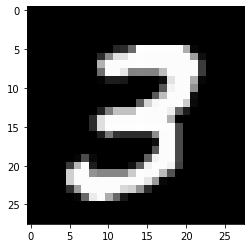

In [ ]:
plt.imshow(x_train[7],cmap="gray")
print(y_train[7])

In [ ]:
y_test1=y_test


In [ ]:
#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[7])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

##Model Fitting

In [ ]:
model=keras.Sequential() #Create a network sequence.
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))
#model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu',input_shape = (28,28,1)))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=6,kernel_size = 5,strides = (1,1), padding = 'same',activation = 'relu'))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

model.add(Conv2D(filters=16,kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'))
model.add(AvgPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))


model.add(Flatten())
model.add(Dense(84,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 6)          0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          880       
                                                                 
 average_pooling2d_2 (Averag  (None, 3, 3, 16)         0

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test))



Epoch 1/10
469/469 [==============================] - 41s 85ms/step - loss: 0.5935 - accuracy: 0.8116 - val_loss: 0.2177 - val_accuracy: 0.9293
Epoch 2/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1756 - accuracy: 0.9474 - val_loss: 0.1151 - val_accuracy: 0.9638
Epoch 3/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1311 - accuracy: 0.9608 - val_loss: 0.0904 - val_accuracy: 0.9721
Epoch 4/10
469/469 [==============================] - 41s 87ms/step - loss: 0.1111 - accuracy: 0.9666 - val_loss: 0.0912 - val_accuracy: 0.9722
Epoch 5/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0973 - accuracy: 0.9701 - val_loss: 0.0710 - val_accuracy: 0.9769
Epoch 6/10
469/469 [==============================] - 43s 93ms/step - loss: 0.0901 - accuracy: 0.9722 - val_loss: 0.0688 - val_accuracy: 0.9776
Epoch 7/10
469/469 [==============================] - 41s 88ms/step - loss: 0.0810 - accuracy: 0.9753 - val_loss: 0.0607 - val_accuracy:

##Results

In [ ]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.0465 - accuracy: 0.9846


In [ ]:
y_pred=model.predict(x_test)
y_pred.shape

(10000, 10)

In [ ]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [ ]:
x_test.shape

(10000, 28, 28)

[2.48387717e-11 5.10281433e-13 1.00000000e+00 8.94330096e-11
 1.03484233e-21 3.03707865e-17 1.33656805e-20 2.93589902e-10
 2.08798812e-10 8.76489689e-20]
2


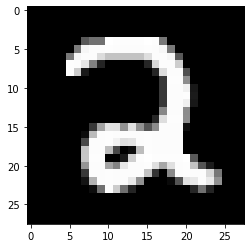

In [ ]:
plt.imshow(x_test[503],cmap="gray")
print(y_pred[503])
print(y_pred1[503])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred1,y_test1))
print(accuracy_score(y_pred1,y_test1))


[[ 970    0    3    0    0    1    5    2    3    2]
 [   0 1127    0    0    0    0    1    2    0    3]
 [   0    3 1012    1    0    0    0    4    0    0]
 [   0    0    0  999    0    9    0    4    4    4]
 [   1    0    0    0  967    0    2    1    1    5]
 [   0    0    0    1    0  874    1    0    1    0]
 [   4    1    0    0    3    2  945    0    2    0]
 [   0    1    4    3    1    1    0 1008    2    7]
 [   3    3   13    4    2    3    4    4  960    4]
 [   2    0    0    2    9    2    0    3    1  984]]
0.9846


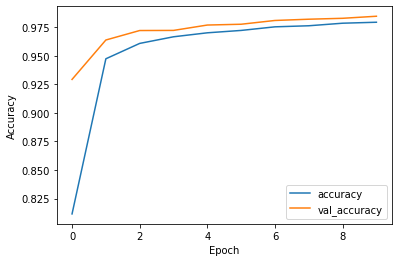

In [ ]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')